In [49]:
import pandas as pd
# 读取肥胖数据
df_obesity = pd.read_csv('Obesity among adults by country/obesity-cleaned.csv')
# 删除男女分开的数据，保留both sexs.
df_obesity = df_obesity[~df_obesity['Sex'].isin(['Male', 'Female'])]
# 删除第一列（数据集自带的类似index的列）
df_obesity = df_obesity.drop(df_obesity.columns[0], axis=1)
# 删除sex列
df_obesity = df_obesity.drop(df_obesity.columns[3], axis=1)
# 删除Obesity的[]的部分
df_obesity['Obesity (%)'] = df_obesity['Obesity (%)'].str.split().str[0]
# 刪除 (%)
df_obesity.rename(columns={"Obesity (%)": 'Obesity'}, inplace=True)

# 重新整理index
df_obesity=df_obesity.reset_index(drop=True)
df_obesity.head()

,Country,Year,Obesity
0,Afghanistan,1975,0.5
1,Afghanistan,1976,0.5
2,Afghanistan,1977,0.6
3,Afghanistan,1978,0.6
4,Afghanistan,1979,0.6


In [50]:
# 读取国家代码表
df_CountryCode = pd.read_csv('Extra data needed/wikipedia-iso-country-codes.csv')
df_CountryCode = df_CountryCode.drop(['Alpha-2 code', 'Numeric code', 'ISO 3166-2'], axis=1)
df_CountryCode.head()

,English short name lower case,Alpha-3 code
0,Zimbabwe,ZWE
1,Zambia,ZMB
2,Yemen,YEM
3,Western Sahara,ESH
4,Wallis and Futuna,WLF


In [51]:
# 将肥胖数据中的国家改为国家代码
df_obesity_merged = pd.merge(df_obesity, df_CountryCode, left_on='Country', right_on='English short name lower case')
df_obesity_merged.drop(['Country', 'English short name lower case'], axis=1, inplace=True)
df_obesity_merged.rename(columns={'Alpha-3 code': 'Country_Code'}, inplace=True)
df_obesity = df_obesity_merged
df_obesity.head()

,Year,Obesity,Country_Code
0,1975,0.5,AFG
1,1976,0.5,AFG
2,1977,0.6,AFG
3,1978,0.6,AFG
4,1979,0.6,AFG


In [52]:
#读取GDP数据
df_GDP = pd.read_csv('Country Economic Indicators/GDP.csv')
df_GDP = df_GDP.rename(columns={'LOCATION': 'Country_Code', 'TIME': 'Year'})
# 删除不需要的列
df_GDP = df_GDP.drop(['INDICATOR', 'SUBJECT', 'FREQUENCY', 'Flag Codes'], axis=1)
# 使用 pivot_table 方法重塑数据框，使得MEASURE=MLN_USD和MEASURE=USD_CAP的两类数据对应的Value分开记作两列
df_GDP_reshaped = df_GDP.pivot_table(index=['Country_Code', 'Year'], columns='MEASURE', values='Value').reset_index().rename_axis(None, axis=1)
# 重命名列
'''MLN_USD: This likely stands for GDP in millions of U.S. dollars, which provides the total economic output of a country valued in USD.
USD_CAP: This typically refers to GDP per capita in U.S. dollars, which divides the country's total economic output by its population, reflecting the average economic output per person, adjusted to U.S. dollars.'''
df_GDP = df_GDP_reshaped.rename(columns={'MLN_USD': 'MLN_USD', 'USD_CAP': 'USD_CAP'})
df_GDP.head()


,Country_Code,Year,MLN_USD,USD_CAP
0,ALB,1997,8555.927,2726.202207
1,ALB,1998,9451.507,3030.636470
2,ALB,1999,10792.634,3482.728286
3,ALB,2000,11926.200,3874.176721
4,ALB,2001,13157.360,4299.547816


In [53]:
# 读取AVWAGE数据集
df_AVWAGE = pd.read_csv('Country Economic Indicators/Average_wage.csv')
df_AVWAGE = df_AVWAGE[['LOCATION', 'TIME', 'Value']]
df_AVWAGE = df_AVWAGE.rename(columns={'LOCATION': 'Country_Code', 'TIME': 'Year','Value': 'AVWAGE'})
df_AVWAGE.head()

,Country_Code,Year,AVWAGE
0,AUS,1990,39875.345702
1,AUS,1991,39685.259630
2,AUS,1992,40481.994276
3,AUS,1993,40854.703847
4,AUS,1994,41131.575639


In [54]:
#读取FERTILITY数据集
df_FERTILITY = pd.read_csv('Country Economic Indicators/Fertility_rates.csv')
df_FERTILITY = df_FERTILITY[['LOCATION', 'TIME', 'Value']]
df_FERTILITY = df_FERTILITY.rename(columns={'LOCATION': 'Country_Code', 'TIME': 'Year','Value': 'FERTILITY'})
df_FERTILITY.head()

,Country_Code,Year,FERTILITY
0,AUS,1960,3.45
1,AUS,1961,3.55
2,AUS,1962,3.43
3,AUS,1963,3.34
4,AUS,1964,3.15


In [55]:
# 读取Employment_rate数据集
df_EMP = pd.read_csv('Country Economic Indicators/Employment_rate.csv')
df_EMP = df_EMP.rename(columns={'LOCATION': 'Country_Code', 'TIME': 'Year','Value': 'EMP'})
# 删除 'SUBJECT' 为 'MEN' 或 'WOMEN' 的行，以及 'MEASURE' 为 'THND_PER' 的行
df_EMP = df_EMP[~((df_EMP['SUBJECT'] == 'MEN') | (df_EMP['SUBJECT'] == 'WOMEN') | (df_EMP['MEASURE'] == 'THND_PER'))]
# 删掉这些列：INDICATOR SUBJECT MEASURE FREQUENCY Flag Codes
df_EMP = df_EMP.drop(columns=['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'])
df_EMP.head()

,Country_Code,Year,EMP
215,AUS,1979,64.38335
216,AUS,1980,65.17445
217,AUS,1981,65.36742
218,AUS,1982,64.16441
219,AUS,1983,61.94022


In [56]:
# 读取Unemployment_rate数据集
df_UR = pd.read_csv('Country Economic Indicators/Unemployment_rate.csv')
df_UR = df_UR.rename(columns={'LOCATION': 'Country_Code', 'TIME': 'Year','Value': 'UR'})
# 删除 'SUBJECT' 为 'MEN' 或 'WOMEN' 的行
df_UR = df_UR[~((df_UR['SUBJECT'] == 'MEN') | (df_UR['SUBJECT'] == 'WOMEN') )]
# 删掉这些列：INDICATOR SUBJECT MEASURE FREQUENCY Flag Codes
df_UR = df_UR.drop(columns=['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'])
''' It is calculated as the labour force (people available to work and actively seeking employment) divided by the total working-age population, which typically includes people aged 15 to 64. '''
df_UR.head()

,Country_Code,Year,UR
0,AUS,1967,1.875
1,AUS,1968,1.850
2,AUS,1969,1.800
3,AUS,1970,1.625
4,AUS,1971,1.925


In [57]:
# 读取Hours_worked数据集（每年工作小时数）
df_HRWKD = pd.read_csv('Country Economic Indicators/Hours_worked.csv')
df_HRWKD = df_HRWKD[['LOCATION', 'TIME', 'Value']]
df_HRWKD = df_HRWKD.rename(columns={'LOCATION': 'Country_Code', 'TIME': 'Year','Value': 'HRWKD'})
df_HRWKD.head()

,Country_Code,Year,HRWKD
0,AUS,1985,1876.0
1,AUS,1986,1877.0
2,AUS,1987,1889.0
3,AUS,1988,1885.0
4,AUS,1989,1875.0


In [58]:
# 读取General_Government_debt数据集
# It stands for "percentage of GDP
df_GGDEBT = pd.read_csv('Country Economic Indicators/General_Government_debt.csv')
df_GGDEBT = df_GGDEBT[['LOCATION', 'TIME', 'Value']]
df_GGDEBT = df_GGDEBT.rename(columns={'LOCATION': 'Country_Code', 'TIME': 'Year','Value': 'GGDEBT'})
df_GGDEBT.head()

,Country_Code,Year,GGDEBT
0,AUS,1995,57.81464
1,AUS,1996,54.86277
2,AUS,1997,53.39208
3,AUS,1998,49.75021
4,AUS,1999,42.02913


In [59]:
# 读取Young_population数据集
df_YNGPOP = pd.read_csv('Country Economic Indicators/Young_population.csv')
df_YNGPOP = df_YNGPOP[['LOCATION', 'TIME', 'Value']]
df_YNGPOP = df_YNGPOP.rename(columns={'LOCATION': 'Country_Code', 'TIME': 'Year','Value': 'YNGPOP'})
df_YNGPOP.head()

,Country_Code,Year,YNGPOP
0,AUS,1950,26.604473
1,AUS,1951,27.145351
2,AUS,1952,27.601459
3,AUS,1953,28.122696
4,AUS,1954,28.590664


In [60]:
#读取排放数据
df_MtCO2 = pd.read_csv('Emissions by Country/GCB2022v27_MtCO2_flat.csv')
df_MtCO2 = df_MtCO2[['ISO 3166-1 alpha-3', 'Year', 'Total']]
df_MtCO2 = df_MtCO2.rename(columns={'ISO 3166-1 alpha-3': 'Country_Code','Total': 'MtCO2'})
df_MtCO2.head()

,Country_Code,Year,MtCO2
0,AFG,1750,0.0
1,AFG,1751,0.0
2,AFG,1752,0.0
3,AFG,1753,0.0
4,AFG,1754,0.0


In [61]:
#清理合并数据框
# 转换函数
def convert_columns_to_str(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)
    return df
# 转换 'Country_Code' 和 'Year' 列为字符串类型
df_obesity = convert_columns_to_str(df_obesity, ['Country_Code', 'Year'])
df_GDP = convert_columns_to_str(df_GDP, ['Country_Code', 'Year'])
df_AVWAGE = convert_columns_to_str(df_AVWAGE, ['Country_Code', 'Year'])
df_FERTILITY = convert_columns_to_str(df_FERTILITY, ['Country_Code', 'Year'])
df_EMP = convert_columns_to_str(df_EMP, ['Country_Code', 'Year'])
df_UR = convert_columns_to_str(df_UR, ['Country_Code', 'Year'])
df_HRWKD = convert_columns_to_str(df_HRWKD, ['Country_Code', 'Year'])
df_GGDEBT = convert_columns_to_str(df_GGDEBT, ['Country_Code', 'Year'])
df_YNGPOP = convert_columns_to_str(df_YNGPOP, ['Country_Code', 'Year'])
df_MtCO2 = convert_columns_to_str(df_MtCO2, ['Country_Code', 'Year'])
# 清理数据的函数
def clean_data(df, value_columns):
    if not isinstance(value_columns, list):
        value_columns = [value_columns]
    for col in value_columns:
        df = df[(df[col] != 0) & (df[col].notnull())]
    return df

# 清理每个数据框
df_obesity_clean = clean_data(df_obesity, 'Obesity')
df_GDP_clean = clean_data(df_GDP, ['MLN_USD', 'USD_CAP'])
df_AVWAGE_clean = clean_data(df_AVWAGE, 'AVWAGE')
df_FERTILITY_clean = clean_data(df_FERTILITY, 'FERTILITY')
df_EMP_clean = clean_data(df_EMP, 'EMP')
df_UR_clean = clean_data(df_UR, 'UR')
df_HRWKD_clean = clean_data(df_HRWKD, 'HRWKD')
df_GGDEBT_clean = clean_data(df_GGDEBT, 'GGDEBT')
df_YNGPOP_clean = clean_data(df_YNGPOP, 'YNGPOP')
df_MtCO2_clean = clean_data(df_MtCO2, 'MtCO2')

# 合并数据框
dfs = [df_GDP_clean, df_AVWAGE_clean, df_FERTILITY_clean, df_EMP_clean, df_UR_clean, df_HRWKD_clean, df_GGDEBT_clean, df_YNGPOP_clean, df_MtCO2_clean]
df_merged = df_obesity_clean
for df in dfs:
    df_merged = df_merged.merge(df, on=['Country_Code', 'Year'], how='inner')

# 展示最终合并后的数据框
df_merged.head()

df_merged

,Year,Obesity,Country_Code,MLN_USD,USD_CAP,AVWAGE,FERTILITY,EMP,UR,HRWKD,GGDEBT,YNGPOP,MtCO2
0,1995,17.6,AUS,403410.089,22405.572327,40973.528964,1.82,67.62838,8.472281,1870.0,57.81464,21.525123,305.002996
1,1996,18.1,AUS,424062.042,23268.405809,42187.475279,1.80,67.66373,8.506114,1862.0,54.86277,21.369744,311.886129
2,1997,18.6,AUS,450299.854,24442.265328,43450.036024,1.78,67.36479,8.362488,1861.0,53.39208,21.214694,320.282630
3,1998,19.1,AUS,477686.538,25671.582448,44066.519950,1.76,67.80048,7.677429,1850.0,49.75021,21.047982,334.075978
4,1999,19.7,AUS,510213.964,27121.296361,45103.501485,1.76,68.23203,6.873791,1856.0,42.02913,20.890904,343.488633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2012,18.0,CHE,479280.805,59933.617056,64582.352889,1.53,78.47500,4.484188,1593.0,43.37218,14.976201,42.253032
499,2013,18.4,CHE,503360.433,62225.112350,65431.069419,1.52,78.40000,4.747292,1573.0,42.59903,14.913937,43.187726
500,2014,18.7,CHE,524917.015,64103.009758,65547.834116,1.54,78.75000,4.829988,1564.0,42.46764,14.881960,39.233632
501,2015,19.1,CHE,546805.519,66020.209520,65909.577139,1.54,79.20000,4.800639,1577.0,42.37722,14.861481,38.731820


In [62]:
df_merged['Year'] = df_merged['Year'].astype(int)
type(df_merged['Year'][1])

numpy.int64

In [64]:
df_2016 = df_merged[df_merged['Year'] == 2016]

df_2016

,Year,Obesity,Country_Code,MLN_USD,USD_CAP,AVWAGE,FERTILITY,EMP,UR,HRWKD,GGDEBT,YNGPOP,MtCO2
21,2016,29.0,AUS,1213189.412,50150.652199,53724.089162,1.79,72.43150,5.710301,1739.0,68.94744,18.902131,411.264288
39,2016,20.1,AUT,460282.647,52665.087457,53169.977860,1.53,71.55000,6.450000,1507.0,102.53350,14.361612,67.210743
57,2016,22.1,BEL,550677.566,48597.487117,55525.989944,1.67,62.30000,7.858333,1574.0,127.66860,16.964254,99.601625
79,2016,29.4,CAN,1678093.396,46472.368771,52019.455888,1.54,72.33334,7.050000,1706.0,114.17370,16.244551,560.525313
91,2016,28.0,CHL,426776.809,23349.677001,28252.106420,1.71,63.34484,6.684913,1977.5,28.09989,20.326532,84.243174
109,2016,19.7,DNK,297719.060,51967.020438,57043.390343,1.79,72.67500,6.008333,1412.0,51.50630,16.765803,37.033259
126,2016,21.2,EST,41201.029,31310.152103,24932.283569,1.60,72.10000,6.833333,1767.0,13.69603,16.152046,17.559353
145,2016,22.2,FIN,246928.493,44934.488245,45588.358260,1.57,69.07500,8.916667,1555.0,75.60892,16.288492,47.181861
159,2016,21.6,FRA,2864105.631,42855.944562,46214.257042,1.89,65.00000,10.066670,1522.0,123.67070,18.363161,334.439780
171,2016,22.3,DEU,4165169.905,50579.483717,51901.819556,1.59,74.65000,4.133333,1395.6,76.96603,13.315149,800.339834


## Correlation

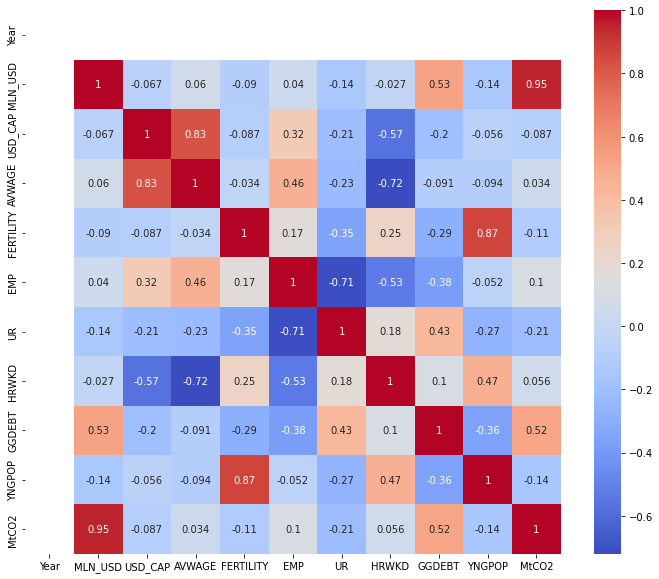

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_2016.corr(numeric_only=True)

#plotting
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Each square (cell) shows the correlation between two variables.
The color of each cell represents the strength and direction of the correlation: red tones typically indicate a positive correlation, blue tones indicate a negative correlation, and the color intensity indicates the strength of the correlation.
The values within the cells range from -1 to 1, which correspond to the possible range of the Pearson correlation coefficient.
A value of 1 means there is a perfect positive linear relationship between the two variables, -1 means there is a perfect negative linear relationship, and 0 means there is no linear relationship.

Based on the heatmap:

- MLN_USD and MtCO2 show a strong positive correlation (0.93), suggesting that as a country's GDP (MLN_USD) increases, so does its CO2 emissions (MtCO2).

- FERTILITY and GGDEBT have a high positive correlation (0.85), which may imply that higher fertility rates could be associated with higher levels of government debt.

- UR and HRWKD are negatively correlated (-0.65), indicating that as unemployment rates (UR) go up, the average weekly working hours (HRWKD) tend to go down.

- GGDEBT and YNGPOP show a negative correlation (-0.27), suggesting that an increase in government debt could be associated with a lower proportion of young population.

However, correlation does not imply causation; these relationships show tendencies, not direct causal links. It is also essential to consider the context and other potential contributing factors when interpreting correlations.For example, although there is a high correlation between GDP and carbon dioxide emissions, we cannot be certain whether it is the growth of GDP that causes an increase in emissions, or if other factors jointly influence these two variables. Similarly, a variable being highly correlated with multiple other variables at the same time may indicate the presence of a multicollinearity problem.







# Assumption 1: Collinearity

In [66]:
print(df_2016.dtypes)

Year              int64
Obesity          object
Country_Code     object
MLN_USD         float64
USD_CAP         float64
AVWAGE          float64
FERTILITY       float64
EMP             float64
UR              float64
HRWKD           float64
GGDEBT          float64
YNGPOP          float64
MtCO2           float64
dtype: object


In [67]:
df_2016['Obesity'] = df_2016['Obesity'].astype(float)

/var/folders/43/l1yc6q1n5hz8dng_8mc4wb3h0000gn/T/ipykernel_9595/1868823355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['Obesity'] = df_2016['Obesity'].astype(float)


In [68]:
print(df_2016.dtypes)

Year              int64
Obesity         float64
Country_Code     object
MLN_USD         float64
USD_CAP         float64
AVWAGE          float64
FERTILITY       float64
EMP             float64
UR              float64
HRWKD           float64
GGDEBT          float64
YNGPOP          float64
MtCO2           float64
dtype: object


In [110]:
df_collinearity = df_2016.copy()

In [111]:
# delete obesity

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 将分类变量转换为虚拟变量
#df_merged = pd.get_dummies(df_merged, columns=['Year', 'Country_Code'], drop_first=True)

# 选择模型中的数值型变量
variables = df_collinearity[['MLN_USD', 'USD_CAP', 'AVWAGE', 'FERTILITY', 'EMP', 'UR', 'HRWKD', 'YNGPOP','GGDEBT','MtCO2']]
# 添加常数项用于VIF计算
variables = sm.add_constant(variables)

# 计算每个变量的VIF值
vif_data = pd.DataFrame()
vif_data['feature'] = variables.columns
vif_data['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

print(vif_data)

      feature          VIF
0       const  1422.263135
1     MLN_USD    15.752480
2     USD_CAP     3.915619
3      AVWAGE     6.461392
4   FERTILITY     7.719707
5         EMP     4.432994
6          UR     3.277995
7       HRWKD     6.475678
8      YNGPOP    11.715303
9      GGDEBT     3.124238
10      MtCO2    18.685135


In [112]:
# delete MLN_USD, MLN_USD and USD_CAP are all economics indicators, and the VIF for MLN_USD is the second biggest.

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 将分类变量转换为虚拟变量
#df_merged = pd.get_dummies(df_merged, columns=['Year', 'Country_Code'], drop_first=True)

# 选择模型中的数值型变量
variables = df_collinearity[['USD_CAP', 'AVWAGE', 'FERTILITY', 'EMP', 'UR', 'HRWKD', 'YNGPOP','GGDEBT','MtCO2']]
# 添加常数项用于VIF计算
variables = sm.add_constant(variables)

# 计算每个变量的VIF值
vif_data = pd.DataFrame()
vif_data['feature'] = variables.columns
vif_data['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

print(vif_data)

     feature          VIF
0      const  1147.247128
1    USD_CAP     3.915079
2     AVWAGE     6.305317
3  FERTILITY     7.692634
4        EMP     4.065157
5         UR     3.241069
6      HRWKD     4.983642
7     YNGPOP    11.544099
8     GGDEBT     3.121381
9      MtCO2     2.194338


In [113]:
# delete Young population

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 将分类变量转换为虚拟变量
#df_merged = pd.get_dummies(df_merged, columns=['Year', 'Country_Code'], drop_first=True)

# 选择模型中的数值型变量
variables = df_collinearity[['USD_CAP', 'AVWAGE', 'FERTILITY', 'EMP', 'UR', 'HRWKD','GGDEBT','MtCO2']]
# 添加常数项用于VIF计算
variables = sm.add_constant(variables)

# 计算每个变量的VIF值
vif_data = pd.DataFrame()
vif_data['feature'] = variables.columns
vif_data['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

print(vif_data)

     feature          VIF
0      const  1145.825377
1    USD_CAP     3.897684
2     AVWAGE     5.521050
3  FERTILITY     1.520190
4        EMP     3.390577
5         UR     3.173448
6      HRWKD     3.103138
7     GGDEBT     2.448647
8      MtCO2     2.175341


In [114]:
# Delete AVWAGE

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 将分类变量转换为虚拟变量
#df_merged = pd.get_dummies(df_merged, columns=['Year', 'Country_Code'], drop_first=True)

# 选择模型中的数值型变量
variables = df_collinearity[['USD_CAP', 'FERTILITY', 'EMP', 'UR', 'HRWKD','GGDEBT','MtCO2']]
# 添加常数项用于VIF计算
variables = sm.add_constant(variables)

# 计算每个变量的VIF值
vif_data = pd.DataFrame()
vif_data['feature'] = variables.columns
vif_data['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

print(vif_data)

df_collinearity = df_collinearity.drop(['Obesity','MLN_USD','YNGPOP','AVWAGE','Year','Country_Code'], axis = 1)
display(df_collinearity)

     feature          VIF
0      const  1132.203242
1    USD_CAP     1.573431
2  FERTILITY     1.383803
3        EMP     3.251171
4         UR     3.076783
5      HRWKD     2.466367
6     GGDEBT     2.424678
7      MtCO2     2.114772


,Year,USD_CAP,FERTILITY,EMP,UR,HRWKD,GGDEBT,MtCO2
21,2016,50150.652199,1.79,72.43150,5.710301,1739.0,68.94744,411.264288
39,2016,52665.087457,1.53,71.55000,6.450000,1507.0,102.53350,67.210743
57,2016,48597.487117,1.67,62.30000,7.858333,1574.0,127.66860,99.601625
79,2016,46472.368771,1.54,72.33334,7.050000,1706.0,114.17370,560.525313
91,2016,23349.677001,1.71,63.34484,6.684913,1977.5,28.09989,84.243174
109,2016,51967.020438,1.79,72.67500,6.008333,1412.0,51.50630,37.033259
126,2016,31310.152103,1.60,72.10000,6.833333,1767.0,13.69603,17.559353
145,2016,44934.488245,1.57,69.07500,8.916667,1555.0,75.60892,47.181861
159,2016,42855.944562,1.89,65.00000,10.066670,1522.0,123.67070,334.439780
171,2016,50579.483717,1.59,74.65000,4.133333,1395.6,76.96603,800.339834


# Combine features to calculate VIF

In [134]:
df_collinearity2 = df_2016.copy()

In [135]:
df_collinearity2['YNGxFer'] = df_collinearity2['YNGPOP'] * df_collinearity2['FERTILITY']

variables = df_collinearity2[['USD_CAP', 'AVWAGE', 'EMP', 'UR', 'YNGxFer', 'HRWKD','GGDEBT','MtCO2']]

variables = sm.add_constant(variables)

# 计算每个变量的VIF值
vif_data = pd.DataFrame()
vif_data['feature'] = variables.columns
vif_data['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

print(vif_data)

   feature          VIF
0    const  1169.577175
1  USD_CAP     3.818242
2   AVWAGE     5.652950
3      EMP     3.402099
4       UR     3.211265
5  YNGxFer     1.739698
6    HRWKD     3.541936
7   GGDEBT     2.459612
8    MtCO2     2.154835


In [136]:
df_collinearity2['WagexEmployment'] = df_collinearity2['AVWAGE'] * df_collinearity2['EMP']

variables = df_collinearity2[['USD_CAP','YNGxFer', 'WagexEmployment', 'UR', 'HRWKD','GGDEBT','MtCO2']]
# 添加常数项用于VIF计算
variables = sm.add_constant(variables)

# 计算每个变量的VIF值
vif_data = pd.DataFrame()
vif_data['feature'] = variables.columns
vif_data['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

print(vif_data)

           feature         VIF
0            const  358.839870
1          USD_CAP    2.781762
2          YNGxFer    1.674867
3  WagexEmployment    4.786740
4               UR    2.108346
5            HRWKD    3.197445
6           GGDEBT    2.353892
7            MtCO2    2.159999


# Assumption 2: Linearity

In [25]:
#pip install --upgrade pandas

In [26]:
#pip install --upgrade seaborn

# After deleting features

In [121]:
# pairplot of df_merged

import seaborn as sns
import matplotlib.pyplot as plt

df_linearity = df_2016.copy()

df_linearity = df_linearity.drop(['MLN_USD','YNGPOP','AVWAGE','Year','Country_Code'],axis = 1)
# df_merged_linear['Year'] = df_merged_linear['Year'].astype(float)
df_linearity.head()

,Obesity,USD_CAP,FERTILITY,EMP,UR,HRWKD,GGDEBT,MtCO2
21,29.0,50150.652199,1.79,72.43150,5.710301,1739.0,68.94744,411.264288
39,20.1,52665.087457,1.53,71.55000,6.450000,1507.0,102.53350,67.210743
57,22.1,48597.487117,1.67,62.30000,7.858333,1574.0,127.66860,99.601625
79,29.4,46472.368771,1.54,72.33334,7.050000,1706.0,114.17370,560.525313
91,28.0,23349.677001,1.71,63.34484,6.684913,1977.5,28.09989,84.243174


In [122]:
df_linearity.columns

Index(['Obesity', 'USD_CAP', 'FERTILITY', 'EMP', 'UR', 'HRWKD', 'GGDEBT',
       'MtCO2'],
      dtype='object')

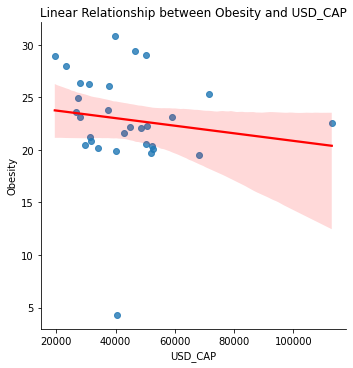

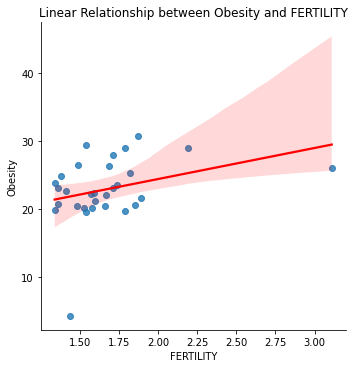

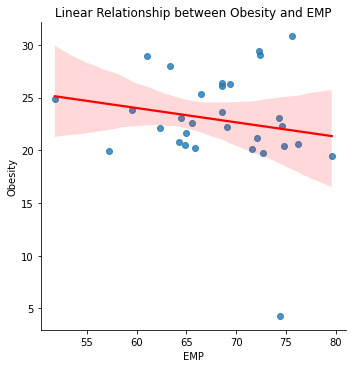

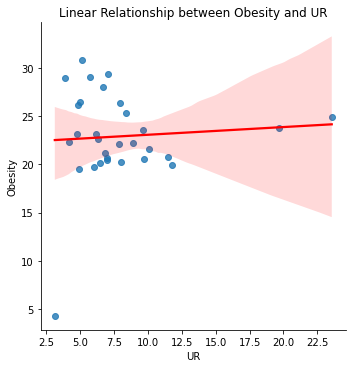

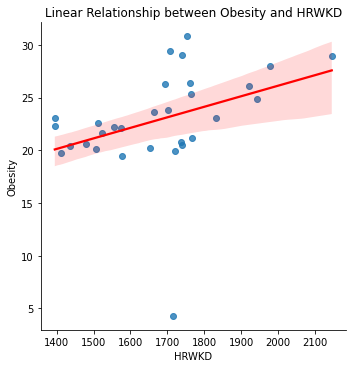

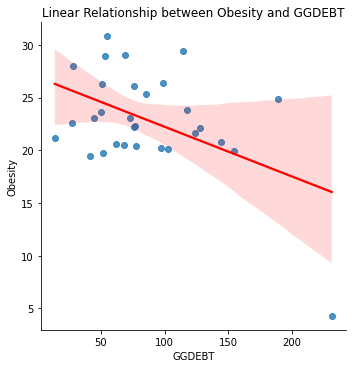

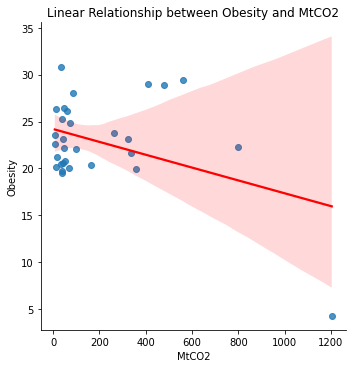

In [123]:
import matplotlib.pyplot as plt

features = ['USD_CAP','FERTILITY','EMP','UR','HRWKD','GGDEBT','MtCO2']

for feature in features:
    sns.lmplot(x = feature, y= 'Obesity', data=df_linearity, line_kws={'color': 'red'})
    plt.title(f'Linear Relationship between Obesity and {feature}')
    plt.show()

In [124]:
# After checking the linearity, all variables roughly has a linear relationship with obesity.

# Combine Features

In [137]:
df_collinearity2 = df_collinearity2.drop(['AVWAGE','FERTILITY','MLN_USD','EMP','YNGPOP','Year','Country_Code'], axis = 1)
df_collinearity2.head()

,Obesity,USD_CAP,UR,HRWKD,GGDEBT,MtCO2,YNGxFer,WagexEmployment
21,29.0,50150.652199,5.710301,1739.0,68.94744,411.264288,33.834815,3.891316e+06
39,20.1,52665.087457,6.450000,1507.0,102.53350,67.210743,21.973266,3.804312e+06
57,22.1,48597.487117,7.858333,1574.0,127.66860,99.601625,28.330304,3.459269e+06
79,29.4,46472.368771,7.050000,1706.0,114.17370,560.525313,25.016608,3.762741e+06
91,28.0,23349.677001,6.684913,1977.5,28.09989,84.243174,34.758370,1.789625e+06


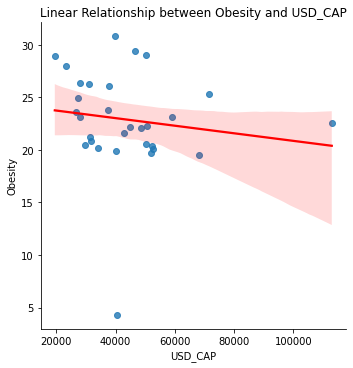

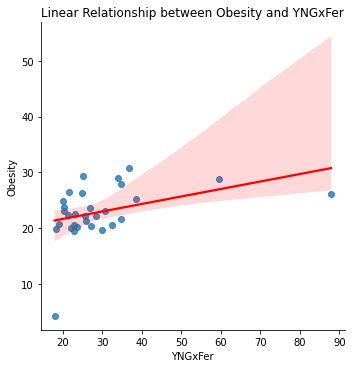

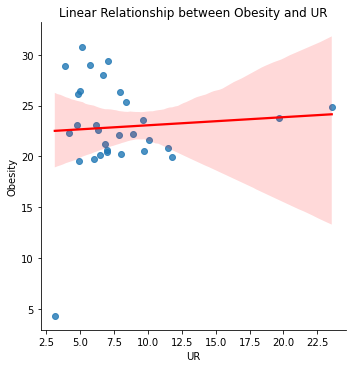

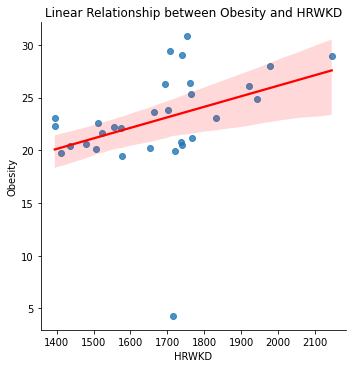

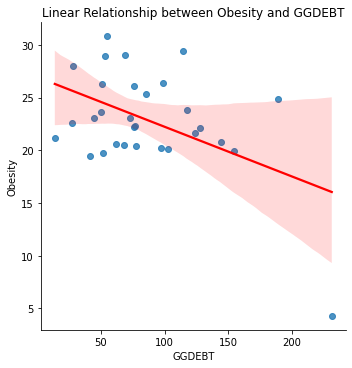

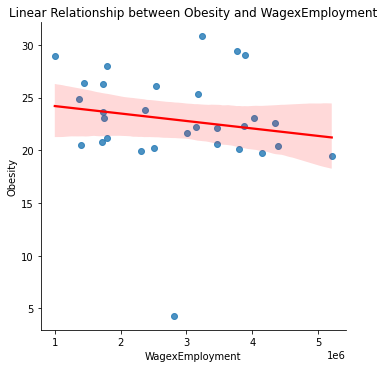

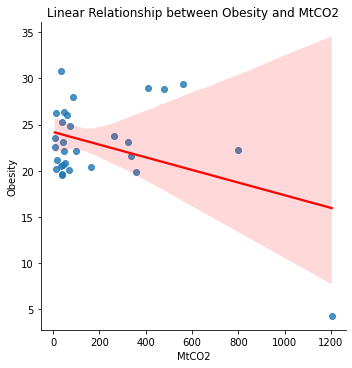

In [139]:
df_linearity2 = df_collinearity2.copy()

features = ['USD_CAP','YNGxFer','UR','HRWKD','GGDEBT','WagexEmployment','MtCO2']

for feature in features:
    sns.lmplot(x = feature, y= 'Obesity', data=df_linearity2, line_kws={'color': 'red'})
    plt.title(f'Linear Relationship between Obesity and {feature}')
    plt.show()

# Assumption 3: Residuals are assumed to be independent

In [31]:
#  Durbin-Watson test
"""
H0 (null hypothesis): There is no correlation among the residuals.
 
H_1 (alternative hypothesis): The residuals are autocorrelated.
"""
 
from statsmodels.formula.api import ols
df_merged_red = df_merged.drop("Country_Code", axis = 1)
 
#fit multiple linear regression model
model = ols('Obesity ~ MLN_USD + USD_CAP + AVWAGE + FERTILITY + EMP + UR + HRWKD + GGDEBT + YNGPOP + MtCO2', data= df_merged_red).fit()
 
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     3.120
Date:                Sat, 02 Dec 2023   Prob (F-statistic):             0.0145
Time:                        17:50:17   Log-Likelihood:                -74.249
No. Observations:                  31   AIC:                             170.5
Df Residuals:                      20   BIC:                             186.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.1402     21.468      1.311      0.2

/Users/masiqi/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/masiqi/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/masiqi/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/masiqi/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_i

In [32]:
from statsmodels.stats.stattools import durbin_watson
 
#perform Durbin-Watson test
durbin_watson(model.resid)

1.5959716937533996

In [33]:
#Since this is close to 2,
#we would consider autocorrelation not to be problematic in this regression model.

# Assumption 4: Homoscedasticity

In [34]:
df_merged_numeric = df_merged.drop(['Country_Code','Year'], axis = 1)
df_merged_numeric

,Obesity,MLN_USD,USD_CAP,AVWAGE,FERTILITY,EMP,UR,HRWKD,GGDEBT,YNGPOP,MtCO2
15,25.6,943179.751,42809.927060,51957.406114,1.95,72.37024,5.213340,1778.0,41.31482,19.057487,405.103320
33,17.6,351341.770,42021.154209,52334.294580,1.44,70.77500,5.191667,1552.0,90.54397,14.822040,72.006411
51,20.1,434081.060,39840.032718,53969.024719,1.84,62.02500,8.316667,1574.0,108.68020,16.927795,114.557864
73,26.0,1363578.975,40099.497886,50024.149304,1.63,71.29166,8.116667,1715.0,105.01620,16.533426,556.560518
85,25.1,309886.434,18129.087986,25245.551096,1.88,60.10410,8.150000,2069.8,15.30875,22.080304,71.310955
103,17.4,238567.314,43008.349298,54928.317132,1.87,71.80000,7.766667,1422.0,53.44129,18.000750,49.203676
120,19.6,28785.782,21589.875970,21990.540191,1.72,61.25000,16.583330,1785.0,11.91295,15.235735,19.002517
139,20.0,208937.272,38956.123401,45211.043445,1.87,68.15000,8.541667,1585.0,54.80778,16.556807,64.080758
153,19.3,2334677.102,35912.031842,44324.951161,2.02,64.37500,9.275000,1540.0,100.99530,18.572426,376.645427
165,19.9,3185430.743,39677.030829,47054.100469,1.39,71.25000,6.966667,1425.7,87.08134,13.429115,832.540983


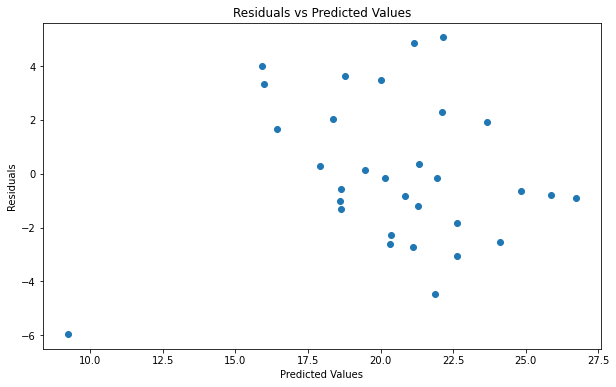

In [35]:
# Homoscedasticity

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

X = df_merged_numeric.drop(['Obesity'], axis=1)
y = df_merged_numeric['Obesity']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [36]:
# Since the residuals are randomly distributed and have no pattern, the data comply with Homoscedasticity.

# Assumption 5: Normality of residuals

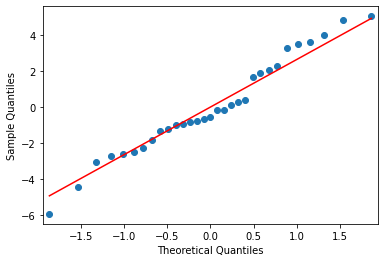

Statistics=0.972, p=0.581
Sample looks Gaussian (fail to reject H0)


In [37]:
# QQ plot and Shapiro-Wilk

from scipy import stats
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line='s')
plt.show()

# 使用Shapiro-Wilk测试来检查误差的正态性
stat, p = stats.shapiro(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))


# H0: The data are normally distributed

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [38]:
# After checking the normality of residuals, the p value is smaller than 0.05, then 

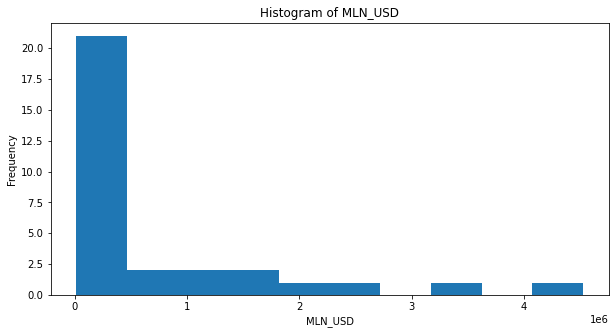

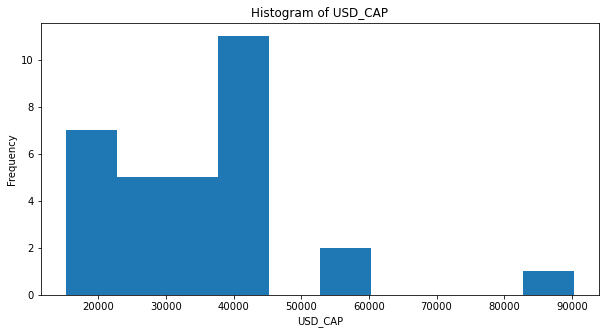

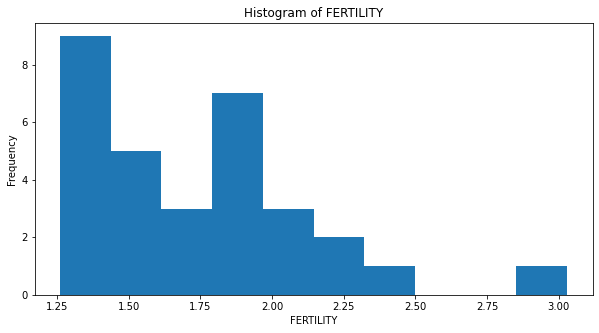

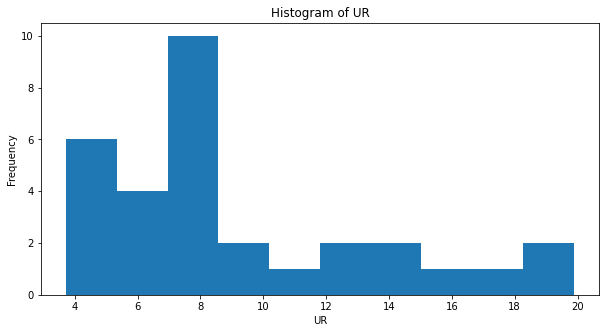

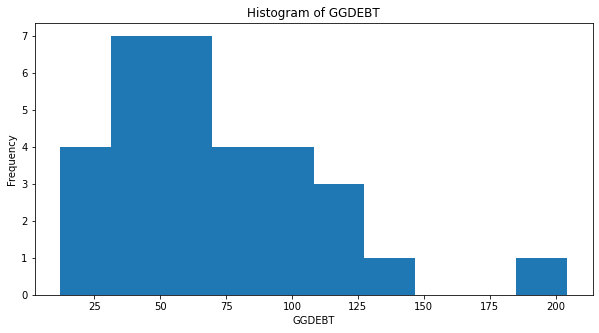

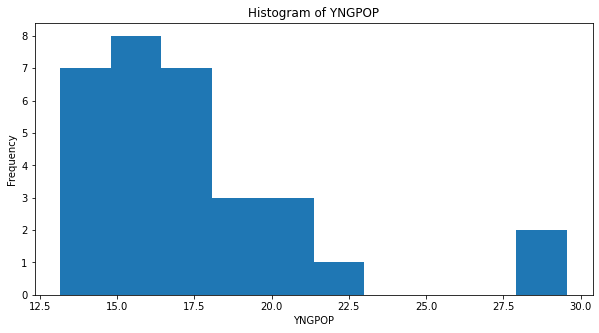

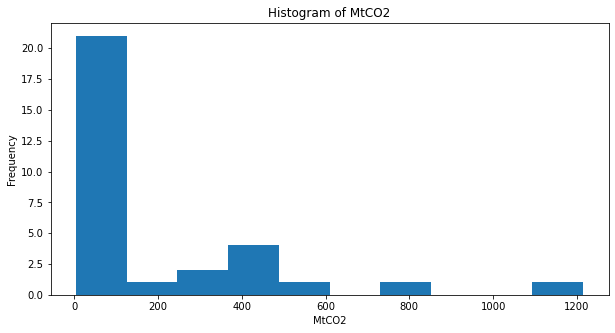

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['MLN_USD', 'USD_CAP', 'FERTILITY', 'UR', 'GGDEBT', 'YNGPOP', 'MtCO2']

for column in columns:
    plt.figure(figsize=(10,5))
    #print(df_merged_numeric[column])
    plt.hist(df_merged_numeric[column])
    plt.title('Histogram of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

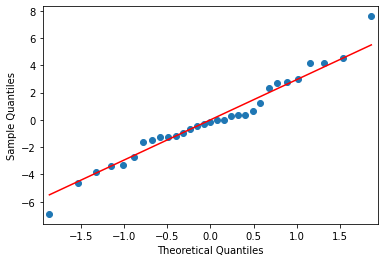

Statistics=0.980, p=0.802
Sample looks Gaussian (fail to reject H0)


In [40]:
# QQ plot and Shapiro-Wilk

from scipy import stats
from statsmodels.graphics.gofplots import qqplot

X = df_merged_numeric.drop(['Obesity','MLN_USD','YNGPOP'], axis=1)
y = df_merged_numeric['Obesity']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
residuals = y - y_pred


qqplot(residuals, line='s')
plt.show()

# 使用Shapiro-Wilk测试来检查误差的正态性
stat, p = stats.shapiro(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))


# H0: The data are normally distributed

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [41]:
# After log transformation, the p value is still smaller than 0.05, therefore, the data is not comply with normality.

# Regression analysis

In [42]:
df_merged_numeric

,Obesity,MLN_USD,USD_CAP,AVWAGE,FERTILITY,EMP,UR,HRWKD,GGDEBT,YNGPOP,MtCO2
15,25.6,943179.751,42809.927060,51957.406114,1.95,72.37024,5.213340,1778.0,41.31482,19.057487,405.103320
33,17.6,351341.770,42021.154209,52334.294580,1.44,70.77500,5.191667,1552.0,90.54397,14.822040,72.006411
51,20.1,434081.060,39840.032718,53969.024719,1.84,62.02500,8.316667,1574.0,108.68020,16.927795,114.557864
73,26.0,1363578.975,40099.497886,50024.149304,1.63,71.29166,8.116667,1715.0,105.01620,16.533426,556.560518
85,25.1,309886.434,18129.087986,25245.551096,1.88,60.10410,8.150000,2069.8,15.30875,22.080304,71.310955
103,17.4,238567.314,43008.349298,54928.317132,1.87,71.80000,7.766667,1422.0,53.44129,18.000750,49.203676
120,19.6,28785.782,21589.875970,21990.540191,1.72,61.25000,16.583330,1785.0,11.91295,15.235735,19.002517
139,20.0,208937.272,38956.123401,45211.043445,1.87,68.15000,8.541667,1585.0,54.80778,16.556807,64.080758
153,19.3,2334677.102,35912.031842,44324.951161,2.02,64.37500,9.275000,1540.0,100.99530,18.572426,376.645427
165,19.9,3185430.743,39677.030829,47054.100469,1.39,71.25000,6.966667,1425.7,87.08134,13.429115,832.540983


In [47]:
df_2016.dtypes

Year                 int64
Obesity             object
Country_Code        object
MLN_USD            float64
USD_CAP            float64
AVWAGE             float64
FERTILITY          float64
EMP                float64
UR                 float64
HRWKD              float64
GGDEBT             float64
YNGPOP             float64
MtCO2              float64
WagexEmployment    float64
YNGxFer            float64
dtype: object

In [48]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#features = ['MLN_USD','USD_CAP', 'FERTILITY','AVWAGE','EMP','HRWKD','UR','GGDEBT','YNGPOP','MtCO2']
features = ['USD_CAP', 'YNGxFer','WagexEmployment','HRWKD','UR','GGDEBT','MtCO2']

#X = df_merged_numeric[features]
X = df_2016[features]
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
#y = df_merged_numeric['Obesity']
y = df_2016['Obesity'].astype(float)

X_scaled = sm.add_constant(X_scaled)

model = sm.OLS(y, X_scaled)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     3.567
Date:                Sun, 10 Dec 2023   Prob (F-statistic):             0.0103
Time:                        21:39:38   Log-Likelihood:                -77.756
No. Observations:                  30   AIC:                             171.5
Df Residuals:                      22   BIC:                             182.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              22.8900      0.689     

In [140]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = ['USD_CAP', 'FERTILITY','EMP','HRWKD','UR','GGDEBT','MtCO2']

X = df_2016[features]

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
y = df_2016['Obesity']

X_scaled = sm.add_constant(X_scaled)

model = sm.OLS(y, X_scaled)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     3.087
Date:                Mon, 11 Dec 2023   Prob (F-statistic):             0.0200
Time:                        16:06:34   Log-Likelihood:                -78.869
No. Observations:                  30   AIC:                             173.7
Df Residuals:                      22   BIC:                             184.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8900      0.715     32.015      0.0

In [45]:
# Everyone except GGDEBT have no significantly impact on obesity.

In [46]:
df_merged_numeric

,Obesity,MLN_USD,USD_CAP,AVWAGE,FERTILITY,EMP,UR,HRWKD,GGDEBT,YNGPOP,MtCO2
15,25.6,943179.751,42809.927060,51957.406114,1.95,72.37024,5.213340,1778.0,41.31482,19.057487,405.103320
33,17.6,351341.770,42021.154209,52334.294580,1.44,70.77500,5.191667,1552.0,90.54397,14.822040,72.006411
51,20.1,434081.060,39840.032718,53969.024719,1.84,62.02500,8.316667,1574.0,108.68020,16.927795,114.557864
73,26.0,1363578.975,40099.497886,50024.149304,1.63,71.29166,8.116667,1715.0,105.01620,16.533426,556.560518
85,25.1,309886.434,18129.087986,25245.551096,1.88,60.10410,8.150000,2069.8,15.30875,22.080304,71.310955
103,17.4,238567.314,43008.349298,54928.317132,1.87,71.80000,7.766667,1422.0,53.44129,18.000750,49.203676
120,19.6,28785.782,21589.875970,21990.540191,1.72,61.25000,16.583330,1785.0,11.91295,15.235735,19.002517
139,20.0,208937.272,38956.123401,45211.043445,1.87,68.15000,8.541667,1585.0,54.80778,16.556807,64.080758
153,19.3,2334677.102,35912.031842,44324.951161,2.02,64.37500,9.275000,1540.0,100.99530,18.572426,376.645427
165,19.9,3185430.743,39677.030829,47054.100469,1.39,71.25000,6.966667,1425.7,87.08134,13.429115,832.540983


# LASSO Regression

In [19]:
df_2016

,Year,Obesity,Country_Code,MLN_USD,USD_CAP,AVWAGE,FERTILITY,EMP,UR,HRWKD,GGDEBT,YNGPOP,MtCO2
21,2016,29.0,AUS,1213189.412,50150.652199,53724.089162,1.79,72.43150,5.710301,1739.0,68.94744,18.902131,411.264288
39,2016,20.1,AUT,460282.647,52665.087457,53169.977860,1.53,71.55000,6.450000,1507.0,102.53350,14.361612,67.210743
57,2016,22.1,BEL,550677.566,48597.487117,55525.989944,1.67,62.30000,7.858333,1574.0,127.66860,16.964254,99.601625
79,2016,29.4,CAN,1678093.396,46472.368771,52019.455888,1.54,72.33334,7.050000,1706.0,114.17370,16.244551,560.525313
91,2016,28.0,CHL,426776.809,23349.677001,28252.106420,1.71,63.34484,6.684913,1977.5,28.09989,20.326532,84.243174
109,2016,19.7,DNK,297719.060,51967.020438,57043.390343,1.79,72.67500,6.008333,1412.0,51.50630,16.765803,37.033259
126,2016,21.2,EST,41201.029,31310.152103,24932.283569,1.60,72.10000,6.833333,1767.0,13.69603,16.152046,17.559353
145,2016,22.2,FIN,246928.493,44934.488245,45588.358260,1.57,69.07500,8.916667,1555.0,75.60892,16.288492,47.181861
159,2016,21.6,FRA,2864105.631,42855.944562,46214.257042,1.89,65.00000,10.066670,1522.0,123.67070,18.363161,334.439780
171,2016,22.3,DEU,4165169.905,50579.483717,51901.819556,1.59,74.65000,4.133333,1395.6,76.96603,13.315149,800.339834


In [20]:
df_2016.dtypes

Year              int64
Obesity          object
Country_Code     object
MLN_USD         float64
USD_CAP         float64
AVWAGE          float64
FERTILITY       float64
EMP             float64
UR              float64
HRWKD           float64
GGDEBT          float64
YNGPOP          float64
MtCO2           float64
dtype: object

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error


X = df_2016.drop(['Obesity','Country_Code','Year'], axis=1)
y = df_2016['Obesity'].astype(float)  # 确保Obesity列是数值型

# 2. 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 训练LASSO模型
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

# 打印最佳的alpha值
print(f'Optimal alpha: {lasso.alpha_}')

# 打印特征系数
print(f'Lasso coefficients: {lasso.coef_}')

# 5. 模型评估
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse}')

lasso_R2 = lasso.score(X_train_scaled, y_train)
print(f"The R2 score of the Lasso regression model is: {lasso_R2}")

Optimal alpha: 0.7579193964206076
Lasso coefficients: [ 0.         -0.         -0.          0.          0.         -0.
  0.93114155 -0.          0.63747158  0.40742338]
Test MSE: 79.09532715174353
The R2 score of the Lasso regression model is: 0.43716184033313954


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
  
X = df_2016.drop(['Obesity','Country_Code','Year','MLN_USD','AVWAGE','YNGPOP'], axis=1)
y = df_2016['Obesity'].astype(float)  # 确保Obesity列是数值型

# 2. 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 训练LASSO模型
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

# 打印最佳的alpha值
print(f'Optimal alpha: {lasso.alpha_}')

# 打印特征系数
print(f'Lasso coefficients: {lasso.coef_}')

# 5. 模型评估
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse}')

lasso_R2 = lasso.score(X_train_scaled, y_train)
print(f"The R2 score of the Lasso regression model is: {lasso_R2}")

Optimal alpha: 0.8126921257076657
Lasso coefficients: [-0.          0.06465448  0.         -0.          1.18654137 -0.
  0.41261511]
Test MSE: 85.27830397958279
The R2 score of the Lasso regression model is: 0.3757500671400894


In [30]:
# 合并项

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 将分类变量转换为虚拟变量
#df_merged = pd.get_dummies(df_merged, columns=['Year', 'Country_Code'], drop_first=True)

# 选择模型中的数值型变量
import pandas as pd


df_2016['WagexEmployment'] = df_2016['AVWAGE'] * df_2016['EMP']

variables = df_2016[['USD_CAP', 'FERTILITY', 'WagexEmployment', 'UR', 'HRWKD','GGDEBT','MtCO2']]
# 添加常数项用于VIF计算
variables = sm.add_constant(variables)

# 计算每个变量的VIF值
vif_data = pd.DataFrame()
vif_data['feature'] = variables.columns
vif_data['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

print(vif_data)


           feature         VIF
0            const  318.736727
1          USD_CAP    2.867603
2        FERTILITY    1.489179
3  WagexEmployment    4.794020
4               UR    2.155685
5            HRWKD    2.712958
6           GGDEBT    2.351261
7            MtCO2    2.178843


/var/folders/43/l1yc6q1n5hz8dng_8mc4wb3h0000gn/T/ipykernel_9595/1835892495.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['WagexEmployment'] = df_2016['AVWAGE'] * df_2016['EMP']


In [ ]:
# 没有合并项 gradient descent
# 有合并的gradient descent